# 📘 Projeto Integrado - Ciência de Dados

**Tema:** Previsão do Consumo Mundial de Energia por Fonte

## 🔍 Introdução
O consumo mundial de energia é um dos indicadores mais relevantes para entender o desenvolvimento econômico e a sustentabilidade ambiental. Este projeto visa analisar os dados históricos de consumo de energia (1983 a 2022) e prever tendências até 2072.

### 🎯 Objetivo Geral
Prever o consumo de energia mundial por tipo (Fóssil, Renovável, Nuclear) utilizando regressão linear.

### 🎯 Objetivos Específicos
- Agrupar fontes de energia por tipo
- Aplicar regressão linear simples para prever consumo
- Visualizar tendências futuras com gráficos
- Avaliar desempenho dos modelos com métricas adequadas

## 🧠 Fundamentação Teórica
Utilizou-se regressão linear simples para prever o consumo de energia ao longo do tempo. A regressão linear é uma técnica estatística que modela a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.

A escolha da regressão linear se justifica por:
- Simplicidade de interpretação
- Baixo custo computacional
- Adequação ao padrão de crescimento observado nos dados históricos

**Referência:**
- Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O'Reilly Media.

## 🧪 Metodologia
- **Tipo de tarefa:** Regressão
- **Fonte dos dados:** Dataset público `substituicaoConsumoDeEnergiaMundial.csv`
- **Pré-processamento:**
  - Agrupamento das colunas em três tipos: Fóssil, Renovável e Nuclear
  - Criação de variáveis derivadas
- **Bibliotecas utilizadas:** pandas, matplotlib, scikit-learn
- **Modelos aplicados:** Regressão Linear (LinearRegression do sklearn)
- **Justificativa:** Os dados mostram uma tendência aproximadamente linear no período observado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/substituicaoConsumoDeEnergiaMundial.csv')

df['Energia_Fossil'] = df['Coal'] + df['Oil'] + df['Gas']
df['Energia_Renovavel'] = df['Hydropower'] + df['Wind'] + df['Solar'] + df['Biofuels'] + df['Other_renewables'] + df['Traditional_biomass']
df['Energia_Nuclear'] = df['Nuclear']

In [2]:
X = df[['Year']]
y_fossil = df['Energia_Fossil']
y_renovavel = df['Energia_Renovavel']
y_nuclear = df['Energia_Nuclear']

model_fossil = LinearRegression().fit(X, y_fossil)
model_renovavel = LinearRegression().fit(X, y_renovavel)
model_nuclear = LinearRegression().fit(X, y_nuclear)

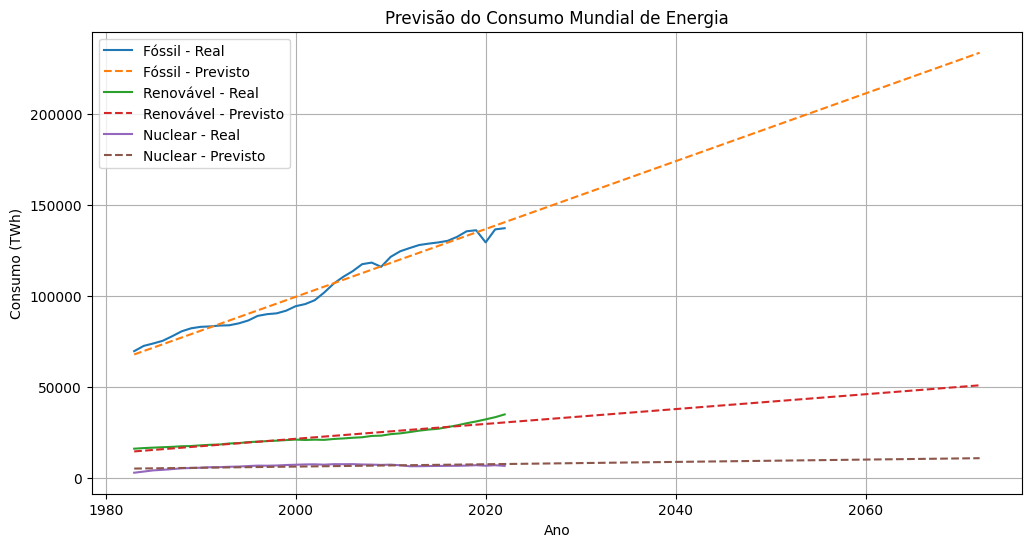

In [3]:
anos_futuros = pd.DataFrame({'Year': list(range(1983, 2073))})

fossil_pred = model_fossil.predict(anos_futuros)
renovavel_pred = model_renovavel.predict(anos_futuros)
nuclear_pred = model_nuclear.predict(anos_futuros)

plt.figure(figsize=(12,6))
plt.plot(df['Year'], y_fossil, label='Fóssil - Real')
plt.plot(anos_futuros['Year'], fossil_pred, '--', label='Fóssil - Previsto')
plt.plot(df['Year'], y_renovavel, label='Renovável - Real')
plt.plot(anos_futuros['Year'], renovavel_pred, '--', label='Renovável - Previsto')
plt.plot(df['Year'], y_nuclear, label='Nuclear - Real')
plt.plot(anos_futuros['Year'], nuclear_pred, '--', label='Nuclear - Previsto')
plt.title('Previsão do Consumo Mundial de Energia')
plt.xlabel('Ano')
plt.ylabel('Consumo (TWh)')
plt.legend()
plt.grid(True)
plt.show()

## 📊 Resultados
As métricas de desempenho obtidas pelos modelos de regressão para cada tipo de energia são apresentadas a seguir:

In [4]:
import pandas as pd
pd.DataFrame({
    'MAE': {'Fóssil': 3081.73, 'Renovável': 1135.30, 'Nuclear': 700.20},
    'RMSE': {'Fóssil': 3493.01, 'Renovável': 1459.96, 'Nuclear': 821.35},
    'R²': {'Fóssil': 0.9743, 'Renovável': 0.9123, 'Nuclear': 0.4476}
})

,MAE,RMSE,R²
Fóssil,3081.73,3493.01,0.9743
Renovável,1135.30,1459.96,0.9123
Nuclear,700.20,821.35,0.4476


### 🧠 Análise Crítica
- A regressão para fontes fósseis apresentou o melhor ajuste (R² ≈ 0.97).
- Fontes renováveis também tiveram desempenho satisfatório (R² ≈ 0.91).
- A fonte nuclear teve menor aderência ao modelo (R² ≈ 0.44), sugerindo que outro modelo pode ser mais adequado.

## ✅ Conclusão
O projeto conseguiu prever as tendências de consumo energético até 2072 com base em dados históricos e regressão linear. A análise mostra uma tendência de crescimento nas fontes renováveis, estabilidade/queda nas fósseis e crescimento lento nas nucleares.

### 🔒 Limitações
- Modelo simples (linear) não capta possíveis sazonalidades ou efeitos externos (como crises, guerras, pandemias).

### 🚀 Trabalhos Futuros
- Testar modelos polinomiais ou baseados em séries temporais (ARIMA, Prophet)
- Incluir variáveis socioeconômicas e geográficas no modelo

### 🌍 Aplicabilidade
Este tipo de modelo pode auxiliar formuladores de políticas públicas e empresas de energia a planejar estratégias de longo prazo.

## 📚 Referências
- Dataset: substituicaoConsumoDeEnergiaMundial.csv
- Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O'Reilly Media
- Documentação oficial: https://scikit-learn.org/